In [18]:
# Importing the necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

df= pd.read_csv(r"C:\Users\Anna-Lena\Downloads\communicate-data-project-template\Project Template\fordgobike-tripdata2.csv")
df.head()

,Unnamed: 0,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_trip,age
0,0,869.75,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,sunday,35.0
1,1,708.68,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,sunday,NaN
2,2,1030.90,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,sunday,47.0
3,3,608.17,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,sunday,30.0
4,4,26.42,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,sunday,45.0


### Explanatory Analyses 

After exploring the data and finding different patterns and interesting insights it time to move to Explanatory analyses. These analyses are meant to explain our findings and at the same time uncomplicated and easy to read. 

##### 1. Trip Duration 

One of the most interesting insights was to know the trip duration. In order to make our analyses more readable, we converted the seconds into minutes. At this point, it was very intriguing to explore the average duration of the trips and at the same time see how it compares with the two user types that we had in this dataset.

In the bar chart below we have visually shown the average duration of a trip sorted by user types. We can clearly see that the costumers category has a higher average (23.8 min.) compared to the subscribers category (10.6 min.).

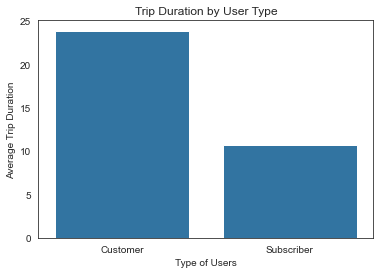

In [19]:
import seaborn as sns
sns.set_style("white")
base_color = sb.color_palette()[0]

ax = sns.barplot(x="user_type", y="duration_min",ci = None, color=base_color, data=df).set_title('Trip Duration by User Type')
plt.ylabel('Average Trip Duration')
plt.xlabel('Type of Users')
plt.show();

##### 2. Day of Trip

As written in the dataset description, this data required a bit of wrangling. Our first step in this part of the analysis was to extract the day from the "start_time" column. Then we recorded the numbers based on the calendar month into real weekday names, to make it simpler for the reader.  The first thing we noticed here was the stability in the number of trips taken by the "customer" group which was very stable during all weekdays. On the other hand, the "subscribers" group was more flexible. We see that subscribers tend to be more active during the weekend and also on Friday as the last working day. 

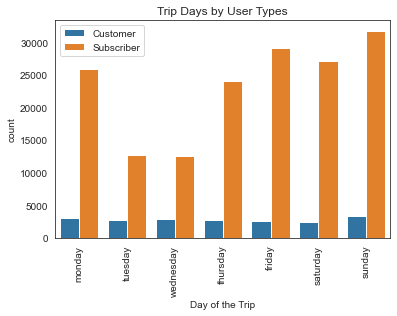

In [20]:
sns.set_style("white")
sb.countplot(data=df, x='day_of_trip', hue='user_type', order=["monday", "tuesday","wednesday","thursday","friday","saturday","sunday"]).set_title('Trip Days by User Types')
plt.xticks(rotation=90);
plt.xlabel('Day of the Trip')
plt.legend(loc=2);

##### Duration of trip by week day

>To our surprise we found that on average the longest trips are taken on tuesday and wednesday in both groups as opposed to the weekends. 

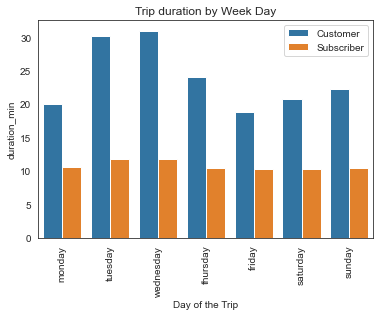

In [21]:
ax = sns.barplot(x="day_of_trip", y="duration_min", hue="user_type", ci=None, data=df, order=["monday", "tuesday","wednesday","thursday","friday","saturday","sunday"]).set_title('Trip duration by Week Day')
plt.xticks(rotation=90);
plt.xlabel('Day of the Trip')
plt.legend(loc=1);

#### Correlation between trip duration and age

> In order to understand if there is a correlation between age of users and trip duration we used sccaterplot as suitable way to represent the relation between these two variables. There is no linear correlation between trip duration and age, however it is noticable that there is a gradual decrease in trip duration above the age of 50. 

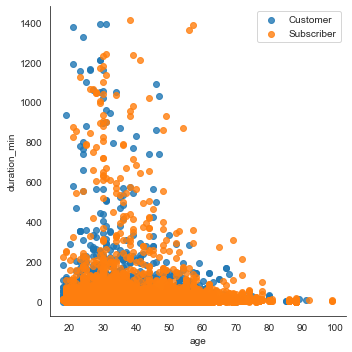

In [22]:
sns.lmplot( x="age", y="duration_min", data=df, fit_reg=False, hue='user_type', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

plt.show()

##### Age by day of trip

To further analyse why the trip duration in tuesday and wednesday is longest compared to te other wekk days we plotted age against day of trip. Intriguingly we find that the average age of users who did the trips on tuesdays and wednesdays is slightly lower (up to 2 years) compared to the rest.

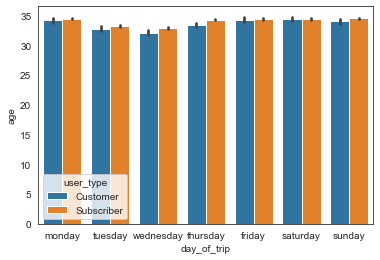

In [23]:
ax = sns.barplot(x="day_of_trip", y="age", hue="user_type", data=df, order=["monday", "tuesday","wednesday","thursday","friday","saturday","sunday"])
